## Step1. 데이터 탐색 (EDA : Exploratory Data Analysis)

In [351]:
import pandas as pd

In [352]:
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
data = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

In [353]:
print("Credit Card Sales Data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Sales Data -  rows: 217607  columns: 13


In [354]:
data.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400
1,AA359351932,32,M,MM270435483,215000,편의점,127.027019,37.587212,20171011,195305,0,0,500
2,AA163500364,24,F,MM270435483,215000,편의점,127.027019,37.587212,20171002,215852,1,0,600
3,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700
4,AA375934003,24,M,MM346843093,215000,편의점,127.027019,37.587212,20171011,92733,1,0,800


In [355]:
data.keys()

Index(['CLNN', 'CLN_AGE', 'SEX_CCD', 'MCT_N', 'MCT_RY_CD', 'MCT_RY_NM',
       'LAL_MCT_XC_VL', 'LAL_MCT_YC_VL', 'APV_TS_D', 'APV_TS_DL_TM', 'CRD_TCD',
       'NS_MS_CN', 'SAA'],
      dtype='object')

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217607 entries, 0 to 217606
Data columns (total 13 columns):
CLNN             217607 non-null object
CLN_AGE          217607 non-null int64
SEX_CCD          217607 non-null object
MCT_N            217607 non-null object
MCT_RY_CD        217607 non-null int64
MCT_RY_NM        217607 non-null object
LAL_MCT_XC_VL    217607 non-null float64
LAL_MCT_YC_VL    217607 non-null float64
APV_TS_D         217607 non-null int64
APV_TS_DL_TM     217607 non-null int64
CRD_TCD          217607 non-null int64
NS_MS_CN         217607 non-null int64
SAA              217607 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 21.6+ MB


In [357]:
## int type의 승인일자와 승인시각 데이터 포맷을 datatime으로 변경

data['APV_TS_D']=data['APV_TS_D'].astype(str)
data['APV_TS_D']=pd.to_datetime(data['APV_TS_D'], format='%Y%m%d')

In [358]:
data.describe()

,CLN_AGE,MCT_RY_CD,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
count,217607.000000,217607.000000,217607.000000,217607.000000,217607.000000,217607.000000,217607.000000,2.176070e+05
mean,33.038735,371046.740224,127.029934,37.586242,146541.209979,0.663306,0.023055,1.680763e+04
std,13.646205,201573.724514,0.001939,0.001874,51319.520947,0.472580,0.324283,1.211919e+05
min,14.000000,115000.000000,127.023601,37.582073,0.000000,0.000000,0.000000,-5.000000e+06
25%,23.000000,215000.000000,127.029160,37.584771,120350.000000,0.000000,0.000000,2.900000e+03
50%,27.000000,312000.000000,127.029640,37.586536,145618.000000,1.000000,0.000000,5.400000e+03
75%,43.000000,331000.000000,127.031232,37.587526,184605.000000,1.000000,0.000000,1.100000e+04
max,95.000000,982000.000000,127.034845,37.590431,235959.000000,1.000000,24.000000,1.500000e+07


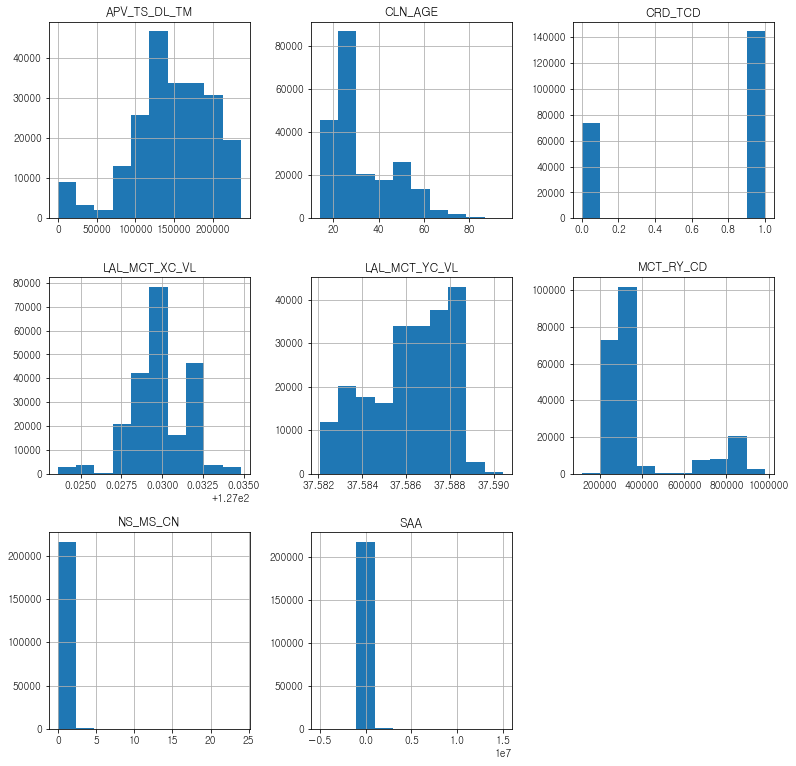

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Feature별 histogram
data.hist(figsize = (13,13))
plt.show()

#### 히스토그램 결과에서 취급액(SAA)에 minus 값 존재, minus인 값 삭제(전처리)

In [360]:
data = data.loc[data['SAA'] > 0]
data.describe()

,CLN_AGE,MCT_RY_CD,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
count,217373.000000,217373.000000,217373.000000,217373.000000,217373.000000,217373.000000,217373.000000,2.173730e+05
mean,33.025100,370661.158470,127.029935,37.586242,146546.096677,0.663744,0.022197,1.730655e+04
std,13.639533,201252.358503,0.001939,0.001875,51329.744587,0.472429,0.315242,1.174155e+05
min,14.000000,115000.000000,127.023601,37.582073,0.000000,0.000000,0.000000,1.000000e+01
25%,23.000000,215000.000000,127.029160,37.584771,120353.000000,0.000000,0.000000,2.900000e+03
50%,27.000000,312000.000000,127.029640,37.586536,145623.000000,1.000000,0.000000,5.400000e+03
75%,43.000000,331000.000000,127.031269,37.587526,184610.000000,1.000000,0.000000,1.100000e+04
max,95.000000,982000.000000,127.034845,37.590431,235959.000000,1.000000,24.000000,1.500000e+07


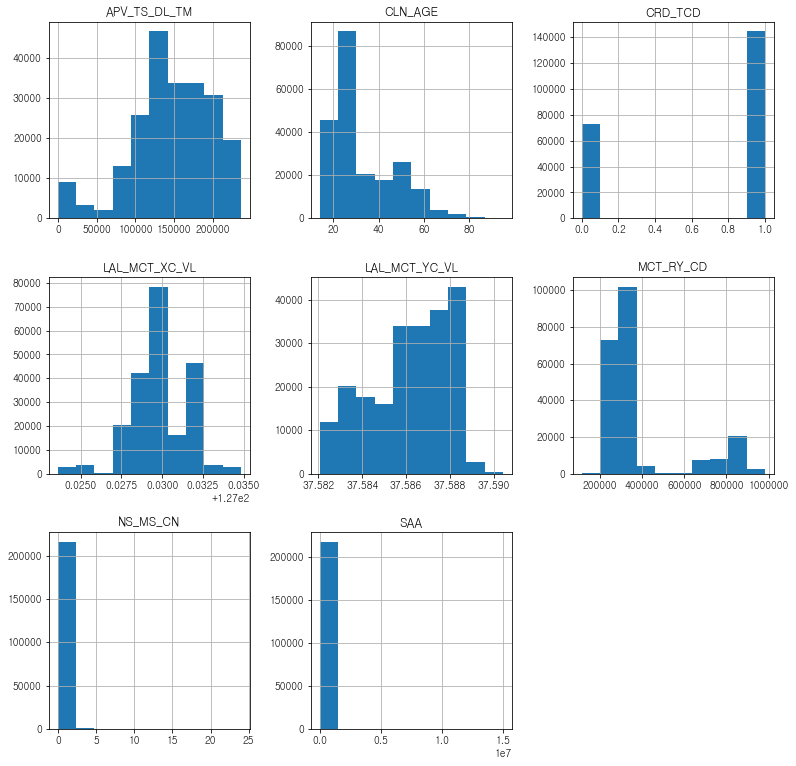

In [361]:
data.hist(figsize = (13,13))
plt.show()

In [362]:
data_mct_ry_sex_count = data.groupby(by = ['MCT_RY_NM','SEX_CCD'], as_index=False)['CLNN'].count()
data_mct_ry_sex_count

,MCT_RY_NM,SEX_CCD,CLNN
0,PC게임방,F,841
1,PC게임방,M,5841
2,가전가전용품,F,9
3,가전가전용품,M,17
4,가정용연료,F,1
5,가정용연료,M,4
6,각종 수리점,F,129
7,각종 수리점,M,722
8,각종회비,F,2
9,각종회비,M,1


In [363]:
# 한글 폰트가 깨지는 문제 해결용
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

### (1) 연령별 분포

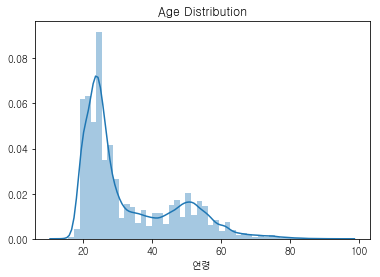

count    217373.000000
mean         33.025100
std          13.639533
min          14.000000
25%          23.000000
50%          27.000000
75%          43.000000
max          95.000000
Name: CLN_AGE, dtype: float64

In [364]:
# 연령별 분포
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data['CLN_AGE'])
plt.xlabel("연령")
plt.title("Age Distribution") 
plt.show()
data['CLN_AGE'].describe()

#### 이용자의 대부분이 20대에 분포되어 있으며, 평균 연령은 33세이다

### (2) 일자별 분포

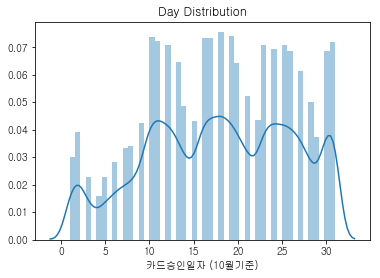

In [365]:
# 일자별 분포를 보기 위해 데이터에 일자 apv_day 추가 
data['APV_DAY'] = data['APV_TS_D'].dt.day

sns.distplot(data['APV_DAY'])
plt.xlabel("카드승인일자 (10월기준)")
plt.title("Day Distribution") # You can comment this line out if you don't need title
plt.show()

#### 일자별 분포를 봤을 때 월 초에는 거래량이 적은데, 이는 2017년 10월 첫째주가 추석 연휴였기 때문으로 추정됨

### (3) 요일별 분포

In [366]:
data['APV_WEEK'] = data['APV_TS_D'].dt.day_name()

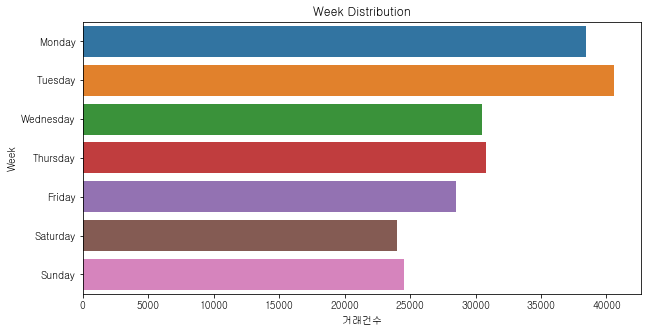

In [367]:
# 요일별 분포

week_count=data['APV_WEEK'].value_counts()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,5))
sns.barplot(week_count.values, week_count.index, order=order)
plt.ylabel("Week")
plt.xlabel("거래건수")
plt.title("Week Distribution")
plt.show()

#### 요일별 건수를 보면 월,화에 거래가 많은 것처럼 보이는데, 10월에 다른 요일보다 월,화가 더 많기 때문에 왜곡이 발생할 수 있음. <br>하지만 토,일에 평소보다 이용이 줄어드는 것은 (왜곡에도 불구하고) 명확해보인다.

### (4) 성별 분포

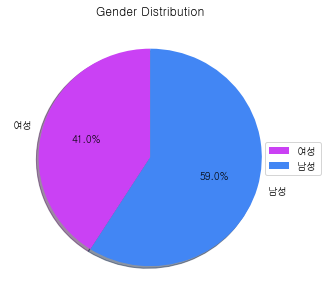

In [368]:
# 성별 분포
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
female = data[data['SEX_CCD']=='F']['CLNN'].count()
male = data[data['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

#### 여성이 41%, 남성이 59%로 남성이 조금 더 많다

### (4) 가맹점 업종별 분포

#### (4)-1. 업종별 건수

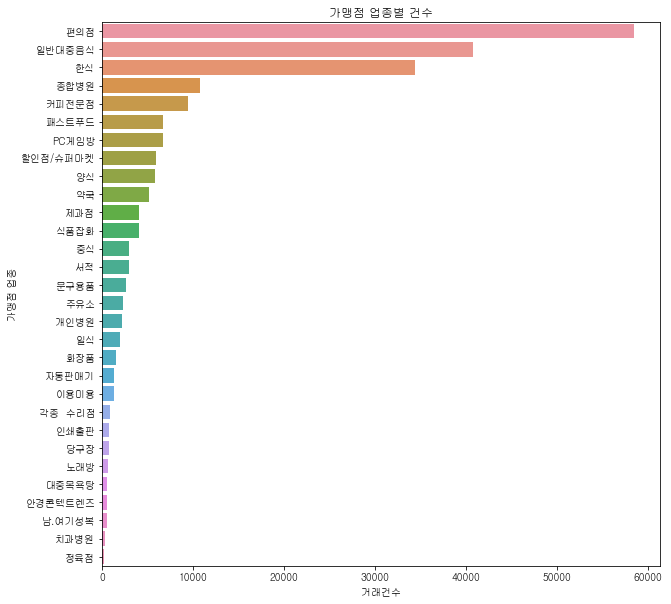

In [369]:
# 가맹점 업종별 단순 건수 그래프

# 가맹점 업종별 건수로 정렬하고 상위 30개 업종만 도출
mct_30 = data['MCT_RY_NM'].value_counts()[:30].to_frame()

plt.figure(figsize=(10,10))
sns.countplot(y='MCT_RY_NM', data=data, order = data['MCT_RY_NM'].value_counts().iloc[:30].index)
plt.xlabel("거래건수")
plt.ylabel("가맹점 업종")
plt.title("가맹점 업종별 건수")
plt.show()

#### (4)-2. 연령별로 많이 이용한 가맹점 업종 TOP 5

In [370]:
dataage20_30 = data.loc[(data['CLN_AGE'] >= 20) & (data['CLN_AGE'] < 30) , :]

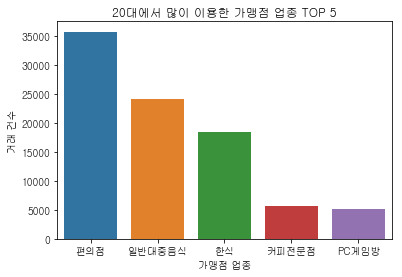

In [371]:
category = data.loc[(data['CLN_AGE'] >= 20) & (data['CLN_AGE'] < 30) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("20대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

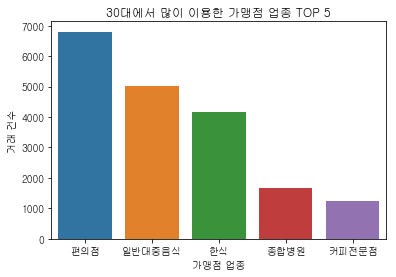

In [372]:
category = data.loc[(data['CLN_AGE'] >= 30) & (data['CLN_AGE'] < 40) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("30대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 30대부터 top 5 업종에 종합병원이 포함되어 있음

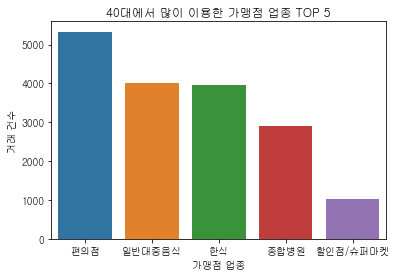

In [373]:
category = data.loc[(data['CLN_AGE'] >= 40) & (data['CLN_AGE'] < 50) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("40대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

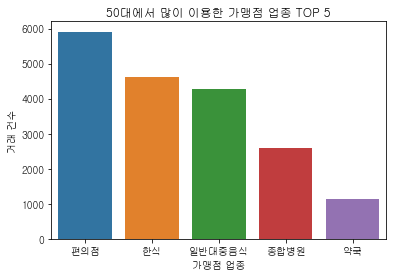

In [374]:
category = data.loc[(data['CLN_AGE'] >= 50) & (data['CLN_AGE'] < 60) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("50대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

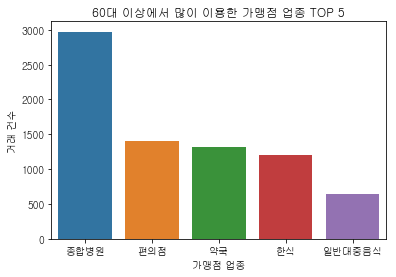

In [375]:
category = data.loc[(data['CLN_AGE'] >= 60), :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("60대 이상에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 60대 이상의 경우, 종합병원 이용 건수가 현저히 높음

#### (4)-3. 특정 업종-예: 종합병원-에 대한 내역만 추출하여 확인

#### 종합병원 이용 고객의 연령별 분포

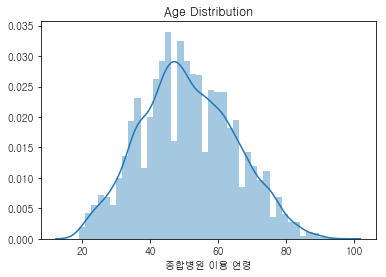

count    10727.000000
mean        50.979211
std         13.742567
min         19.000000
25%         41.000000
50%         50.000000
75%         61.000000
max         95.000000
Name: CLN_AGE, dtype: float64

In [376]:
# 가맹점 업종 - 종합병원에 대해서만
datahospitol = data.loc[data['MCT_RY_NM'] == '종합병원', :]

# 종합병원 이용 연령별 분포
import seaborn as sns
sns.distplot(datahospitol['CLN_AGE'])
plt.xlabel("종합병원 이용 연령")
plt.title("Age Distribution")
plt.show()
datahospitol['CLN_AGE'].describe()

#### 전체 연령별 분포와 다르게, 종합병원 이용 고객의 분포는 50대를 평균으로 좌우 고르게 전 연령에 걸쳐 분포되어 있음을 알 수 있다

### (5) 연령별 이용건수 분포

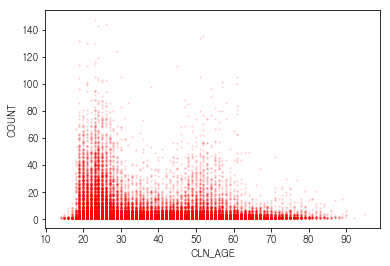

In [377]:
""" 연령별 이용건수 분포 확인 """
temp01=data.groupby(["CLNN","CLN_AGE"]).size().reset_index(name="COUNT")
temp02=data.groupby(["CLNN","SAA"]).size().reset_index(name="SUM")
plt.scatter(temp01["CLN_AGE"], temp01["COUNT"], c = 'red', s = 2, alpha = 0.1)
plt.xlabel("CLN_AGE")
plt.ylabel("COUNT")
plt.show()
del temp01

### (6) 연령별/업종별 취급액/이용건수 pivot

In [378]:
data["AGE_CCD"] = data["CLN_AGE"] // 10 * 10
data["SAA(10K)"] = data["SAA"] / 10000
""" 연령별/업종별 취급액/이용건수 pivot 생성"""
pivot_mct_ry = pd.pivot_table(data=data, index = ['MCT_RY_NM'], values = ['SAA'],
columns = ['AGE_CCD'], aggfunc = [len], fill_value = 0)
pivot_mct_ry.columns = ['10대','20대','30대','40대','50대','60대','70대','80대','90대']
pivot_mct_ry_sort = pivot_mct_ry.sort_values(by = "20대", ascending=False)

In [379]:
pivot_mct_ry_sort

,10대,20대,30대,40대,50대,60대,70대,80대,90대
MCT_RY_NM,,,,,,,,,
편의점,3307,35723,6804,5330,5910,1143,223,34,0
일반대중음식,2753,24095,5029,4021,4264,490,136,15,1
한식,2034,18434,4162,3968,4630,853,307,35,2
커피전문점,404,5645,1236,880,1019,163,23,3,0
PC게임방,608,5164,403,189,295,17,5,1,0
패스트푸드,286,4234,731,678,664,92,18,0,0
양식,336,3522,749,450,623,97,17,2,0
할인점/슈퍼마켓,161,2585,823,1026,914,312,89,15,0
식품잡화,235,2252,481,457,501,69,17,4,0


### (6) 신용/체크카드 구분에 따른 분포

In [380]:
# 신용 정보 (0:체크, 1: 신용카드)
dataage_crd_tcd_0 = data.loc[data['CRD_TCD']== 0 , :]
dataage_crd_tcd_1 = data.loc[data['CRD_TCD']== 1 , :]

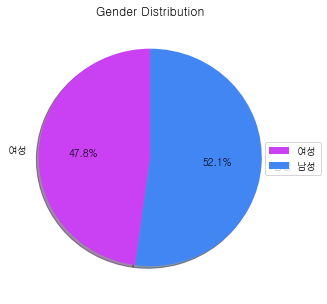

In [381]:
#체크 카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']=='F']['CLNN'].count()
male = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

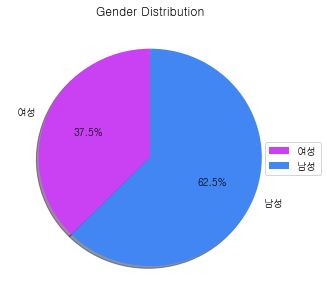

In [382]:
#신용카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']=='F']['CLNN'].count()
male = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']=='M']['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

### 가맹점 좌표 데이터 지도에 찍어보기

In [383]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import folium
import sys



""" 데이터 불러오기 """
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
df = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

""" 연령코드 생성 """
df["AGE_CCD"] =  df["CLN_AGE"] // 10 * 10 
df["SAA(10K)"] =  df["SAA"] / 10000 




""" 좌표값 셋팅을 위한 빈리스트 선언 """
lattitude2=[]
longitude2=[]

""" X좌표 Y좌표 값만 셋팅(건수컬럼삭제) """
lattitude1=df.groupby(["LAL_MCT_XC_VL"]).size().reset_index(name="건수")
del lattitude1["건수"]
longitude1=df.groupby(["LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del longitude1["건수"]

lattitude2=lattitude1["LAL_MCT_XC_VL"].values
longitude2=longitude1["LAL_MCT_YC_VL"].values


""" 하나의 데이터프레임으로 X,Y좌표값 합치기 """
lattitude3=df.groupby(["LAL_MCT_XC_VL","LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del lattitude3["건수"]

lattitude3.info()

"""  X,Y좌표값 컬럼값변환 """
lattitude3.columns=["X","Y"]


""" 고대안암병원 좌표 셋팅 """
KU = [37.58721205, 127.0270194]

""" 가맹점 좌표 갯수만큼만  """
MAX_RECORDS = lattitude3["X"].count()
"""print(lattitude3[0:MAX_RECORDS].iterrows())"""
# create empty map zoomed in on San Francisco

map_osm = folium.Map(location=KU, zoom_start=16)

# add a marker for every record in the filtered data, use a clustered view

for each in lattitude3[0:MAX_RECORDS].iterrows():
    folium.Marker(location = [each[1]['Y'],each[1]['X']],popup='address').add_to(map_osm)
  
map_osm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
LAL_MCT_XC_VL    351 non-null float64
LAL_MCT_YC_VL    351 non-null float64
dtypes: float64(2)
memory usage: 5.6 KB
